# Add Observability to PaddleOCR by HiQ

The following main.py code is from PaddleOCR's official website [chinese-english-model-and-multilingual-model](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.4/doc/doc_en/quickstart_en.md#221-chinese--english-model-and-multilingual-model)



In [1]:
!cat main.py

import os
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image

here = os.path.dirname(os.path.realpath(__file__))

def main():
    ocr = PaddleOCR(use_angle_cls=True, lang='en')
    img_path = f'{here}/img_12.jpg'
    result = ocr.ocr(img_path, cls=True, rec=True)
    image = Image.open(img_path).convert('RGB')
    boxes = [line[0] for line in result]
    txts = [line[1][0] for line in result]
    scores = [line[1][1] for line in result]
    im_show = draw_ocr(image, boxes, txts, scores, font_path=f'{here}/simfang.ttf')
    im_show = Image.fromarray(im_show)
    im_show.save('result.jpg')

if __name__ == "__main__":
    main()


In [1]:
import hiq
from hiq.framework.paddleocr import PaddleOcrHiQMemory

driver = PaddleOcrHiQMemory(attach_timestamp=True)
hiq.mod("main").main()
driver.show()

[2022/04/10 00:03:14] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/ubuntu/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/ubuntu/.paddleocr/whl/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=

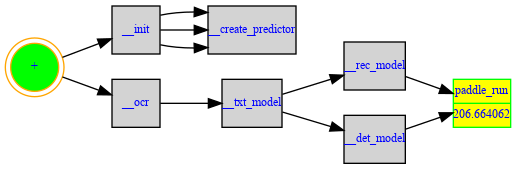

In [2]:
from hiq import KEY_MEMORY
from IPython.display import Image
t = driver.get_metrics(metrics_key=KEY_MEMORY)[0]
Image(t.to_img())

In [3]:
t.show()

[     293.305 -      623.367]  [100.00%] 🟢_root_get_memory_mb(330.0625)
[     293.305 -      398.262]  [ 31.80%]    |___init(104.9570)
[     293.426 -      341.051]  [ 14.43%]    |  |___create_predictor(47.6250)
[     341.051 -      369.918]  [  8.75%]    |  |___create_predictor(28.8672)
[     369.918 -      398.262]  [  8.59%]    |  l___create_predictor(28.3438)
[     398.262 -      623.367]  [ 68.20%]    l___ocr(225.1055)
[     404.426 -      627.801]  [ 67.68%]       l___txt_model(223.3750)
[     408.480 -      623.586]  [ 65.17%]          |___det_model(215.1055)
[     434.949 -      641.613]  [ 62.61%]          |  l_paddle_run(206.6641)
[     623.586 -      627.801]  [  1.28%]          l___rec_model(4.2148)
[     627.547 -      627.801]  [  0.08%]             l_paddle_run(0.2539)

